#**PRCP- 1001- Rice leaf disease detection**

**Task 1:**-Prepare a complete data analysis report on the given data.

**Task 2**:-Create a model which can classify the three major attacking diseases of rice plants like leaf blast, bacterial blight and brown spot.

**Task3**:- Analyze various techniques like Data Augmentation, etc and create a report on that.

Link: https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1001-RiceLeaf.zip



# **Domain Analysis**

This dataset contains 119 jpg images of disease-infected rice leaves. The images are grouped into 3 classes based on the type of disease. There are 40 images in each class.
Classes

*   Bacterial leaf blight
*   Brown spot

*  Leaf smut


##1) **Bacterial Leaf Blight:**


**Cause Agent**:

Bacterial leaf blight is primarily caused by the bacterium Xanthomonas oryzae pv. oryzae.

**Symptoms**:

It manifests as water-soaked lesions, which later turn brown and elongate. Lesions often have a "v" shape.


**Challenges**:

 Distinguishing early-stage BLB lesions from other diseases with similar symptoms can be challenging. The disease can spread rapidly, leading to yield losses.


##2) **Brown Spot**:

**Cause Agent**:

Caused by the fungus Cochliobolus miyabeanus.

**Symptoms**:

Small, circular to oval-shaped lesions with a brown center and a yellowish halo. Lesions may coalesce, affecting larger areas of the leaf.

**Challenges**:
Brown spot is often confused with other diseases. Early detection is crucial for effective management.

##3) **Leaf Smut**:

**Cause Agent**:

The fungus, causing leaf smut, is typically Tilletia barclayana.

**Symptoms**:

Infected leaves show dark, irregular smut-filled patches. As the disease progresses, the smut masses break open, releasing spores.

**Challenges**:

 Distinguishing leaf smut from other diseases and ensuring accurate identification at different stages is important for effective control.

## **Common Challenges in Rice Leaf Disease Detection**:

### **Overlapping Symptoms**:

 Diseases may exhibit similar symptoms, making it challenging to differentiate between them, especially in the early stages.

### **Environmental Factors**:
External factors such as humidity, temperature, and nutrient levels can influence disease development, adding complexity to the detection process.

### **Data Variability**:
Obtaining diverse and representative datasets with various stages of disease progression is crucial for training robust models.

### **Model Generalization**:
 Developing models that can generalize well across different rice varieties, growth stages, and environmental conditions is essential for practical applications.

## **Technological Approaches**:

### **Image Processing and Computer Vision**:
Utilizing image processing techniques and computer vision algorithms to extract relevant features from leaf images.

### **Deep Learning Models**:
Training deep neural networks (e.g., **Convolutional Neural Networks or CNNs**) for automated feature extraction and classification.

### **Data Augmentation**:
Enhancing dataset diversity through techniques like image rotation, flipping, and scaling to improve model robustness.

### **Transfer Learning**:
Leveraging pre-trained models on large datasets for tasks related to image recognition can boost performance with limited labeled data.







In [ ]:
# prompt: please give me a code to import libraries which are relevant to this project?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model



# **Import Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
Image_size = (3081, 897)
Batch_size = 12
Channels = 3
Epochs = 10

In [ ]:
dataset = tf. keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/Rice_leaf", shuffle = True, image_size = Image_size, batch_size = Batch_size)

Found 119 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Bacterial_leaf_blight', 'Brown spot', 'Leaf smut']

In [ ]:
len(dataset)

10

In [ ]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())

(12, 3081, 897, 3)
[0 2 1 2 0 0 2 1 1 0 2 1]


# To visualize the images

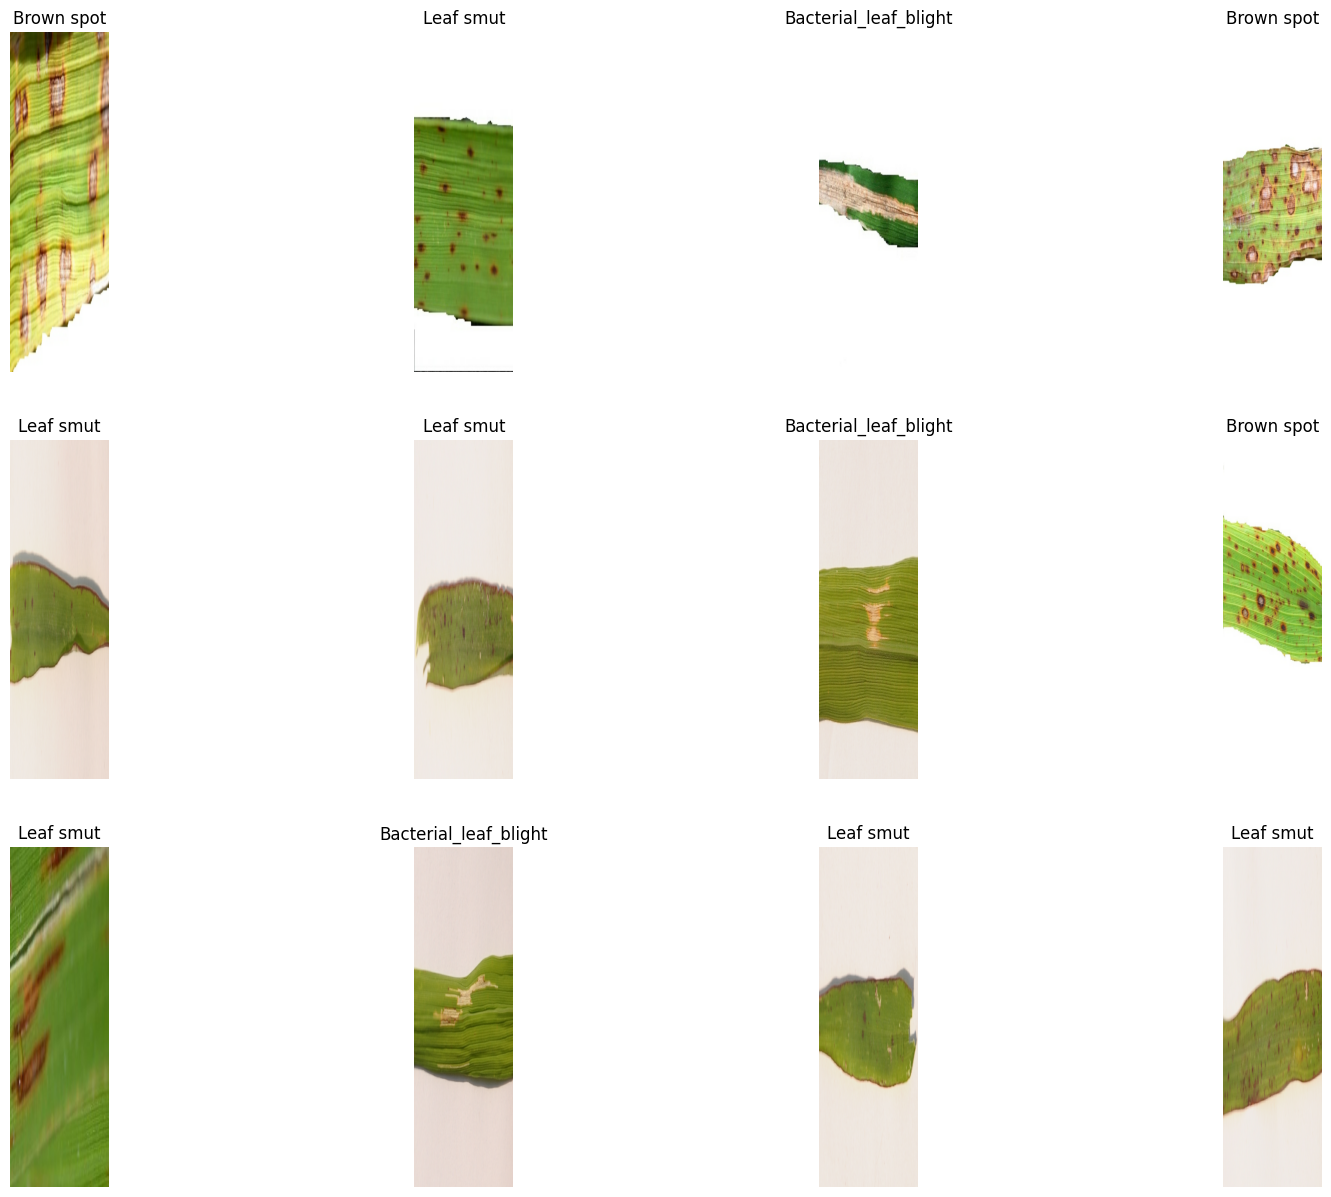

In [ ]:
plt.figure(figsize=(20,15))
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

## Split dataset into train, test and validation

### 80% of data is taken for training,
### 20% of data is again splitted into validation(10%) and testing(10%)

In [ ]:
# size of the train data
train_size = 0.8
len(dataset)*train_size

8.0

In [ ]:
dataset.take(10)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 3081, 897, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
train_ds = dataset.take(8)
len(train_ds)

8

In [ ]:
test_ds = dataset.skip(8)
len(test_ds)

2

In [ ]:
val_size = 0.1
len(dataset)*val_size

1.0

In [ ]:
val_ds = test_ds.take(1)
len(val_ds)

1

In [ ]:
test_ds = test_ds.skip(1)
len(test_ds)

1

In [ ]:
def get_dataset_partition_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
  ds_size = len(ds)

  if shuffle:
    ds = ds.shuffle(shuffle_size, seed =12)

  train_size =int(train_split * ds_size)
  val_size = int(val_split * ds_size)

  train_ds = ds.take(train_size)

  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)

  return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partition_tf(dataset)

In [ ]:
len(train_ds)

8

In [ ]:
len(val_ds)

1

In [ ]:
len(test_ds)

1

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_da = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
# prompt: how to check if the image is resized or not?

# Check the shape of the image after resizing
resized_image = resize_and_rescale(image_batch)
print(f"Resized image shape: {resized_image.shape}")


Resized image shape: (12, 256, 256, 3)


In [ ]:
# prompt: please give me a code to build a model?

input_shape = (256, 256, 3)

# Define the model
model = tf.keras.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

# Train the model
history = model.fit(train_ds, validation_data=val_ds, epochs=Epochs)

# Evaluate the model
loss, accuracy = model.evaluate(test_ds)
print("Loss:", loss)
print("Accuracy:", accuracy)

# Save the model
model.save('rice_leaf_disease_model.h5')


# Model Architecture

In [ ]:
input_shape = (12,256, 256, 3)
n_classes = 3

# Define the model
model = tf.keras.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model.build(input_shape = input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (12, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (12, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (12, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (12, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (12, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (12, 62, 62, 64)          0         
 g2D)                                                 

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(
    train_ds,
    epochs = 10,
    batch_size = 12,
    verbose = 1,
    validation_data = val_ds
)


Epoch 1/10
8/8 [==============================] - ETA: 0s - loss: 5.0470 - accuracy: 0.3333

In [ ]:
# prompt: please generate code to train model?

model.fit(train_ds, epochs=10, batch_size=12, verbose=1, validation_data=val_ds)


Epoch 1/10
8/8 [==============================] - ETA: 0s - loss: 6.0167 - accuracy: 0.3542

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def create_model(input_shape=(224, 224, 3)):
    model = tf.keras.Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax')  # 3 output classes
    ])

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

